X:	Y:	   TS1:	   TS2: 	TOT:FPGA_TS:  TR_CNT:  BinCounter :  
HIT 3	317	1013	63	1	0	 0 25786 2026
HIT 3	318	1012	6	8	0	 0 25906 2024
HIT 3	319	1013	63	1	0	 0 26026 2026
HIT 23	338	408	51	0	0	 0 27146 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = open("data_blanket_no_lights_2.txt", "r")
#data_all = data.read()
data_lines = data.readlines()
#print(data_all[66498000:66498560])

In [5]:
#data = open("data_test_2.txt", "r")
#data_all = data.read()
#print(data_all[0:200])

X:	Y:	   TS1:	   TS2: 	TOT:FPGA_TS:  TR_CNT:  BinCounter :  
TRIGGER 0 7589914
HIT 21	64	767	42	11	7589914	 0 63751 1508
TRIGGER 1 15590063
HIT 21	96	767	42	11	15590063	 1 64518 847
TRIGGER 2 23590212


In [3]:
daq_dataframe = {}
X, Y, TS1, TS2, TOT = [], [], [], [], []
unique_params = ['X', 'Y', 'TS1', 'TS2', 'TOT']

for line in data_lines:
    entry = line.strip().split()
    if 'HIT' in line and len(entry)>8:
        X.append(float(entry[1]))
        Y.append(float(entry[2]))
        TS1.append(float(entry[3]))
        TS2.append(float(entry[4]))
        TOT.append(float(entry[5]))

In [4]:
for k in range(len(X)):
    daq_dataframe[k] = {'X':X[k], 'Y':Y[k], 'TS1':TS1[k], 'TS2':TS2[k], 'TOT':TOT[k]}

In [5]:
daq_table = pd.DataFrame(daq_dataframe)
daq_data = daq_table.T

In [6]:
daq_data

,X,Y,TS1,TS2,TOT
0,1.0,217.0,76.0,13.0,4.0
1,20.0,104.0,598.0,16.0,6.0
2,7.0,395.0,974.0,58.0,1.0
3,13.0,81.0,103.0,18.0,6.0
4,7.0,396.0,974.0,62.0,5.0
...,...,...,...,...,...
1929918,20.0,302.0,963.0,61.0,5.0
1929919,19.0,302.0,963.0,59.0,3.0
1929920,20.0,303.0,964.0,56.0,0.0
1929921,19.0,303.0,964.0,56.0,0.0


In [7]:
x_val, y_val, tot = np.zeros(len(daq_data)), np.zeros(len(daq_data)), np.zeros(len(daq_data))

for i in range(len(daq_data)):
    x_val[i] = float(daq_data['X'][i:i+1][i])
    y_val[i] = float(daq_data['Y'][i:i+1][i])
    tot[i] = float(daq_data['TOT'][i:i+1][i])

Text(0.5, 1.0, 'DAQ Data 0.9 V Blanket, No Light (2)')

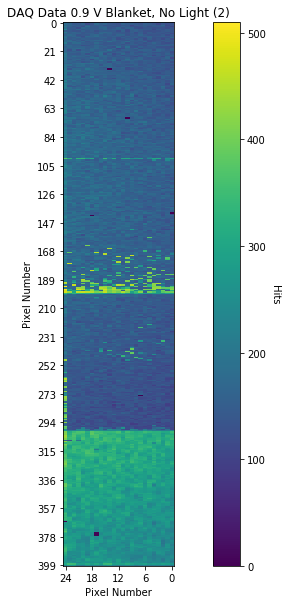

In [8]:
# Plot heatmap
x_num = 25
y_num = 400
x_dim = 130*(10**-4)
y_dim = 40*(10**-4)
half_width = x_num*x_dim/2
half_height = y_num*y_dim/2

x_pos, y_pos = np.zeros(len(X)), np.zeros(len(Y))

for i in range(len(X)):
    x_pos[i] = -(X[i]*x_dim) + half_width - (x_dim/2)
    y_pos[i] = -(Y[i]*y_dim) + half_height - (y_dim/2)

from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10))
plt.gca().set_aspect('equal', adjustable='box')
ax = plt.gca()

x_edges = np.linspace(-half_width, half_width, x_num+1)
y_edges = np.linspace(-half_height, half_height, y_num+1)

limits = [-half_width, half_width, -half_height, half_height]
H, xedges, yedges = np.histogram2d(x_pos, y_pos, bins=[x_edges, y_edges])
H = H.T
im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]])
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Hits', rotation=-90, va="bottom")
ax.set_xticks(np.linspace(0,24,5)*-x_dim + half_width - (x_dim/2))
ax.set_yticks(np.linspace(0,399,20)*-y_dim + half_height - (y_dim/2))
ax.set_xticklabels(np.linspace(0,24,5,dtype=int))
ax.set_yticklabels(np.linspace(0,399,20,dtype=int))

plt.ylabel('Pixel Number')
plt.xlabel('Pixel Number')
plt.title('DAQ Data 0.9 V Blanket, No Light (2)')

Text(0.5, 1.0, 'DAQ Hits Data')

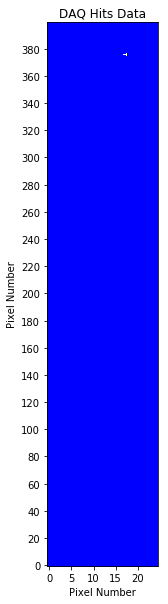

In [10]:
# Plot hit map

from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(x_pos[0:5000], y_pos[0:5000], '.', color='blue')
plt.xlim(-half_width, half_width)
plt.ylim(-half_height, half_height)

ax.set_xticks((np.arange(0,x_num,5)*x_dim - half_width + (x_dim/2)))
ax.set_yticks((np.arange(0,y_num,20)*y_dim - half_height + (y_dim/2)))
ax.set_xticklabels(np.arange(0,x_num,5))
ax.set_yticklabels(np.arange(0,y_num,20))

plt.ylabel('Pixel Number')
plt.xlabel('Pixel Number')
plt.title('DAQ Hits Data')

In [37]:
len(x_pos)

1930696

In [45]:
daq_data['X'][1:2][1]

3.0

<BarContainer object of 13 artists>

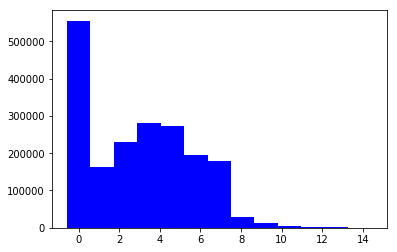

In [11]:
bins = np.linspace(0,15,14)
fit_hist, bins_1 = np.histogram(tot, bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])
plt.bar(bins_2, fit_hist, width=bins[1] - bins[0], color='blue')

In [50]:
TS1_val, TS2_val = np.zeros(len(daq_data)), np.zeros(len(daq_data))

for i in range(len(daq_data)):
    TS1_val[i] = float(daq_data['TS1'][i:i+1][i])
    TS2_val[i] = float(daq_data['TS2'][i:i+1][i])

(array([1.0000e+00, 2.4000e+01, 1.2657e+04, 2.7977e+04, 3.0431e+04,
        2.8277e+04, 2.8288e+04, 2.8047e+04, 3.0367e+04, 2.8171e+04,
        2.7922e+04, 2.8036e+04, 2.9489e+04, 2.7959e+04, 2.8131e+04,
        2.8091e+04, 3.0136e+04, 2.8140e+04, 2.7886e+04, 2.7790e+04,
        3.0422e+04, 2.8022e+04, 2.8345e+04, 2.7863e+04, 2.9915e+04,
        2.7824e+04, 2.8311e+04, 2.8343e+04, 3.0303e+04, 2.7881e+04,
        2.7556e+04, 2.7044e+04, 2.7114e+04, 2.0137e+04, 1.4659e+04,
        1.0006e+04, 4.4570e+03, 3.5340e+03, 8.4990e+03, 1.4364e+04,
        2.0106e+04, 2.6427e+04, 2.7958e+04, 2.7886e+04, 3.0499e+04,
        2.7643e+04, 2.7955e+04, 2.7616e+04, 3.0150e+04, 2.8227e+04,
        2.8169e+04, 2.8311e+04, 3.0008e+04, 2.8183e+04, 2.8409e+04,
        2.7690e+04, 3.0258e+04, 2.7791e+04, 2.8027e+04, 2.7782e+04,
        3.0231e+04, 2.8201e+04, 2.8006e+04, 2.7907e+04, 2.9868e+04,
        2.7599e+04, 2.7743e+04, 2.8085e+04, 2.9970e+04, 2.7711e+04,
        2.6670e+04, 2.3713e+04, 1.9635e+04, 1.23

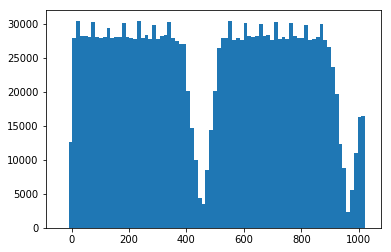

In [58]:
tot_stamps = np.zeros(len(daq_data))

for i in range(len(daq_data)):
    tot_stamps[i] = TS1_val[i] - TS2_val[i]
    
plt.hist(tot_stamps, bins=80)

pulse generator @ 1 V, pulse height at 0.5 V:
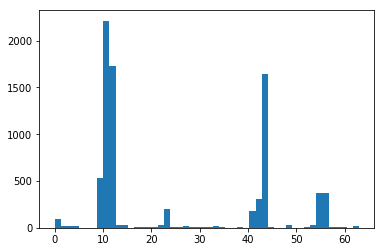